# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "馬宗儀"
student_id = "b06201006"

---

# Exercise 1 - Bisection

### Use the bisection method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define a function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        # Hint: return ...
        # ===== 請實做程式 =====
        a=np.cosh(x)+np.cos(x)-c
        return a
        # ====================
    return f

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1

### 2. Implement the algorithm

In [5]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    # ===== 請實做程式 =====
    [a, b]=interval
    if func(a)==0:
        return a
    elif func(b)==0:
        return b
    elif func(a)*func(b)>0:
        return None
    else:
        num_iterations=0
        a_next, b_next=a, b
    
        if report_history:
            history={'estimation': [], 'error': []}
        while True:
            c=(a_next+b_next)/2
            error=(b_next-a_next)/2
        
            if report_history:
                history['estimation'].append(c)
                history['error'].append(error)
            
            if error<tolerance:
                print('the approximation has satisfied the tolerance')
                if report_history:
                    return (c, history)
                else:
                    return c
            if num_iterations< max_iterations:
                num_iterations+=1
            
                if func(a_next)*func(c)<0:
                    b_next=c
                elif func(b_next)*func(c)<0:
                    a_next=c
                else:
                    if report_history:
                        return (c, history)
                    else:
                        return c
            else:
                print('Terminate since reached the maximum iterations.')
                if report_history:
                    return (c, history)
                else:
                    return c
            
    # ====================

Test your implementation with the assertion below.

In [6]:
root = bisection(lambda x: x**2 - x - 1, [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

the approximation has satisfied the tolerance


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

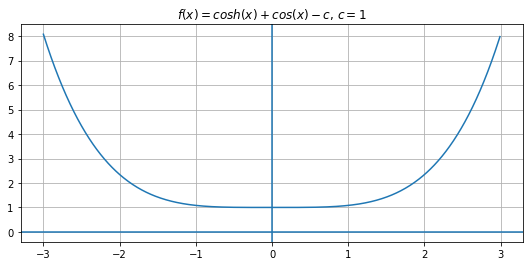

In [7]:
c = 1
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 ======
search_range=np.arange(-3.0, 3.0, 0.01)  
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
# ===== 請實做程式 =====
root=bisection(f, [-1.0, 3.0] , max_iterations=100, tolerance=1e-10, report_history=False)
# ====================

In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

Because it has no root

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

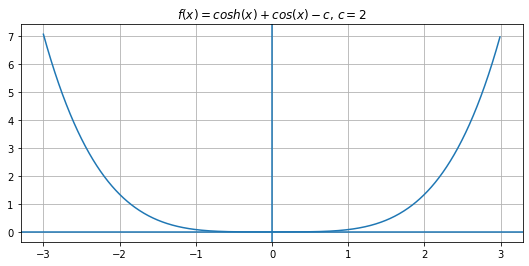

In [10]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-3.0, 3.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [11]:
# Hint: root = ?
# ===== 請實做程式 =====
root=bisection(f, [-1.0, 3.0] , max_iterations=1000, tolerance=1e-10, report_history=False)
# ====================

In [24]:
print('My estimation of root:', root)


My estimation of root: (1.8579208291484974, -1.8579208291484974)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

Because $f(x)\geq0$ for all $x$, the method failed

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

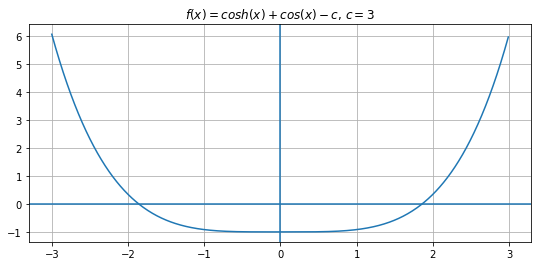

In [13]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-3.0, 3.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [14]:
# Hint: root = ?
# ===== 請實做程式 =====
root=bisection(f, [-1.0, 3.0] , max_iterations=1000, tolerance=1e-10, report_history=False),bisection(f, [-3.0, 1.0] , max_iterations=1000, tolerance=1e-10, report_history=False)
# ====================

the approximation has satisfied the tolerance
the approximation has satisfied the tolerance


In [15]:
print('My estimation of root:', root)


My estimation of root: (1.8579208291484974, -1.8579208291484974)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [22]:
solution, history = bisection(
    f, 
    [-1.0, 3.0],
    max_iterations=10000,
    tolerance=1e-10,
    report_history=True
)


the approximation has satisfied the tolerance


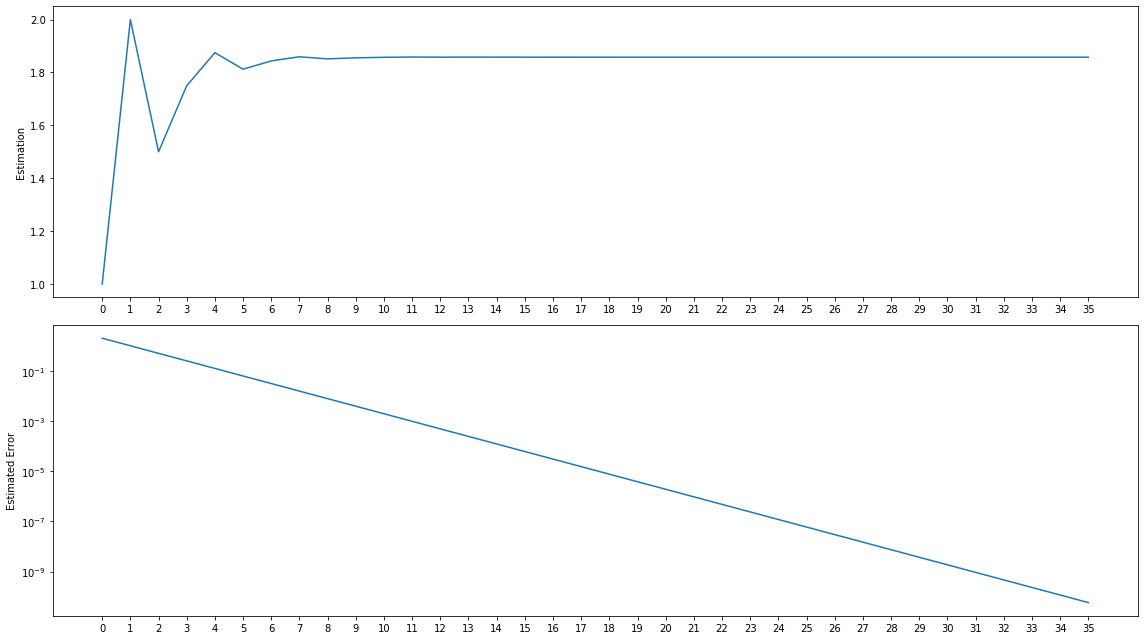

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [20]:
solution, history = bisection(
    f, 
    [-3.0, 1.0],
    max_iterations=1000,
    tolerance=1e-10,
    report_history=True
)

the approximation has satisfied the tolerance


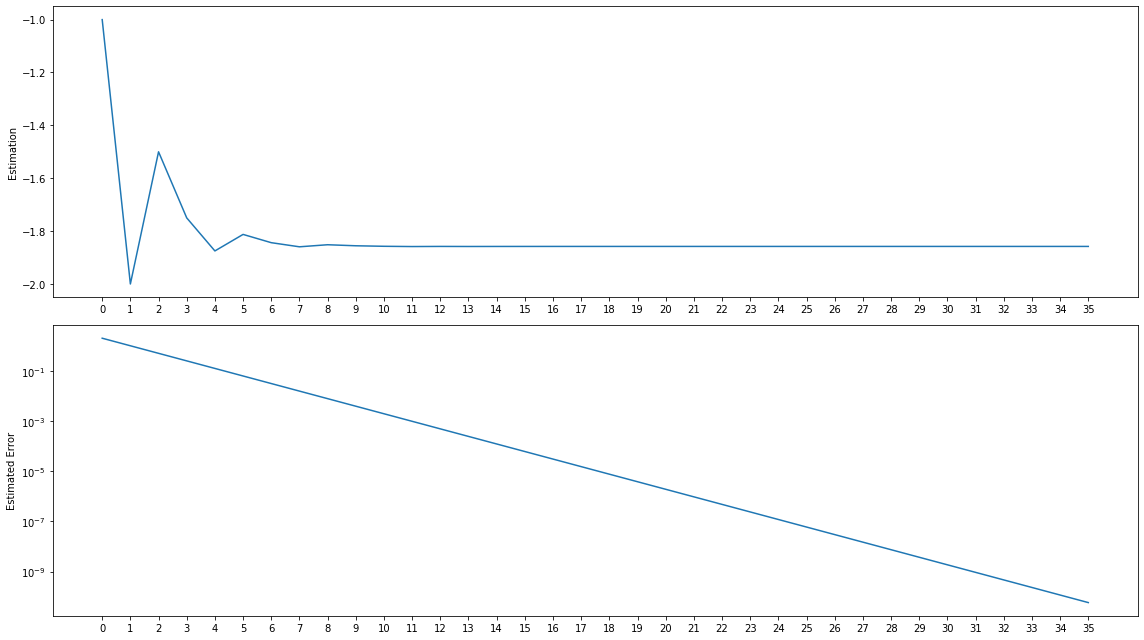

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

no, for c=2, unless we choose interval that 0 on the boundary. it can't find the root.